## Ejercicio: Prediccción género musical de canciones utilizando Multinomial Navie Bayes. 

En este ejercicio trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. 

Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto. 

Cada csv tiene el nombre del artista a analizar. 

Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras. 

En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a partir de la letra de una canción. 

Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

### 1. Preparar el ambiente de trabajo.


Importe los módulos numpy, pandas, matplotlib , seaborn, glob y os. 

Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump. 

Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. 

Posteriormente genere un objeto pd.DataFrame que contenga todos los csv. 

Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

import glob
import os

In [2]:
file_list=glob.glob(os.getcwd()+'/dump/*.csv')

In [3]:
file_list[:5]

['/mnt/c/users/jcdata/desktop/Ejercicios-Machine-Learning/Clasificacion-Canciones-Naive-Bayes/dump/anthrax_scrape.csv',
 '/mnt/c/users/jcdata/desktop/Ejercicios-Machine-Learning/Clasificacion-Canciones-Naive-Bayes/dump/a_tribe_called_quest_scrape.csv',
 '/mnt/c/users/jcdata/desktop/Ejercicios-Machine-Learning/Clasificacion-Canciones-Naive-Bayes/dump/black_star_scrape.csv',
 '/mnt/c/users/jcdata/desktop/Ejercicios-Machine-Learning/Clasificacion-Canciones-Naive-Bayes/dump/bob_dylan_scrape.csv',
 '/mnt/c/users/jcdata/desktop/Ejercicios-Machine-Learning/Clasificacion-Canciones-Naive-Bayes/dump/britney_spears_scrape.csv']

In [4]:
append_csv=[]
for f in file_list:
    append_csv.append(pd.read_csv(f,index_col=None,header=0).drop(columns='Unnamed: 0'))

In [5]:
append_csv[5]

,0,1,2,3
0,Bruce Springsteen,rock,Blinded By The Light,Madman drummers bummers and Indians in the sum...
1,Bruce Springsteen,rock,Growin' Up,Well I stood stone-like at midnight \n Suspend...
2,Bruce Springsteen,rock,Mary Queen Of Arkansas,"Mary Queen of Arkansas, it's not too early for..."
3,Bruce Springsteen,rock,Does This Bus Stop At 82nd Street?,"Hey bus driver, keep the change \n Bless your ..."
4,Bruce Springsteen,rock,Lost In The Flood,The ragamuffin gunner is returnin' home like a...
5,Bruce Springsteen,rock,The Angel,"The angel rides with hunch-backed children, po..."
6,Bruce Springsteen,rock,For You,Princess cards she sends me with her regards \...
7,Bruce Springsteen,rock,Spirit In The Night,Crazy Janey and her Mission Man \n Were back i...
8,Bruce Springsteen,rock,It's Hard To Be A Saint In The City,I had skin like leather and the diamond-hard l...
9,Bruce Springsteen,rock,The E Street Shuffle,Sparks fly on E Street when the boy prophets w...


In [6]:
df_lyrics=pd.concat(append_csv)
df_lyrics.columns=['Artist','Genre','Song','Lyrics']
df_lyrics.head()

,Artist,Genre,Song,Lyrics
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


In [7]:
df_lyrics.shape

(9489, 4)

### 2. Descripción de los datos. 

Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información: 

La cantidad de canciones registradas por cada artista, ordenado de mayor a menor. 

La cantidad de canciones registradas en cada género, ordenados de mayor a menor. 

Comente sobre las principales tendencias.
 

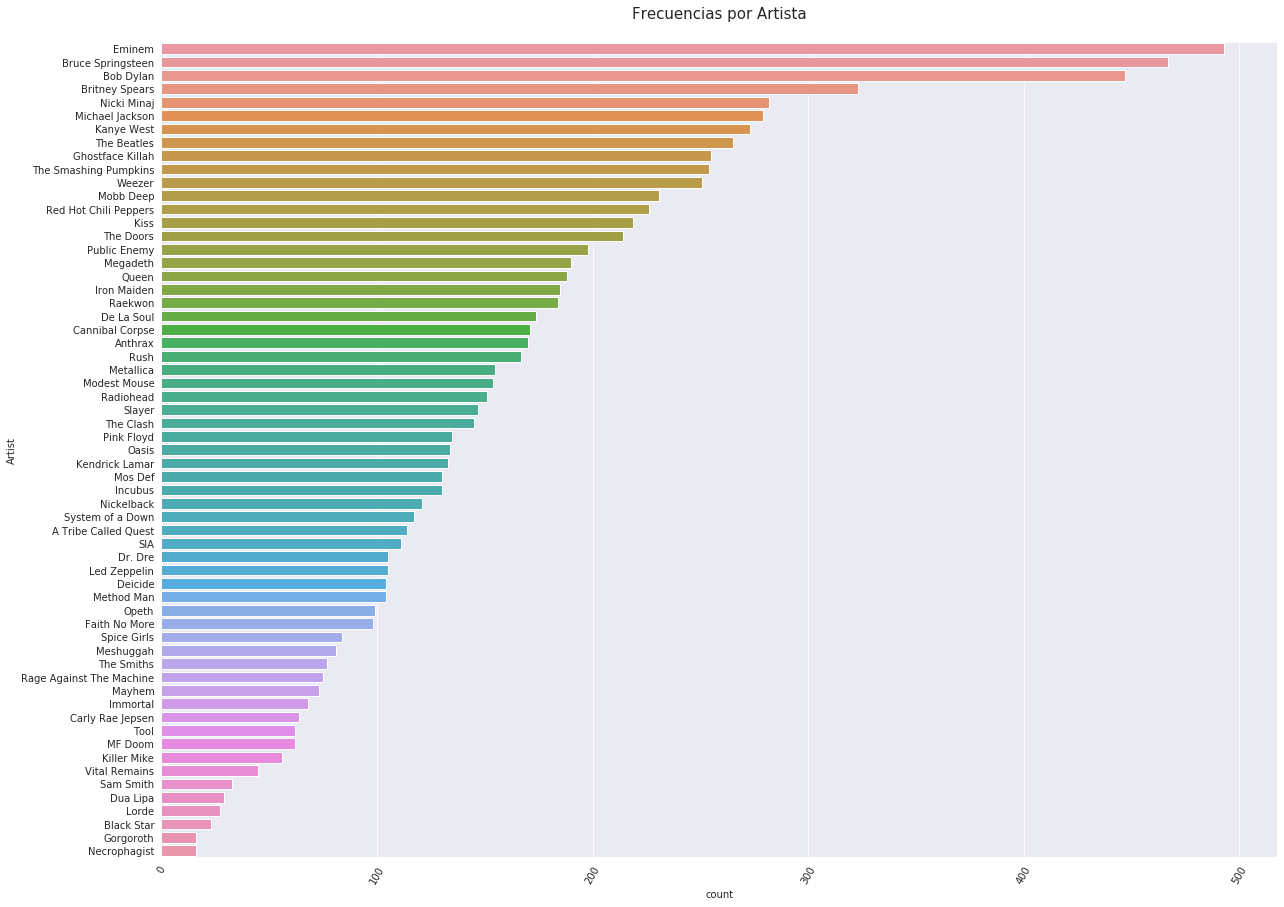

In [8]:
plt.figure(figsize=(20, 15))
sn.countplot(y= df_lyrics['Artist'],order = df_lyrics['Artist'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Frecuencias por Artista\n',fontsize=15)
plt.show()

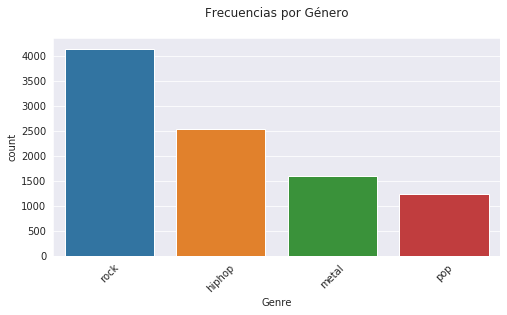

In [9]:
plt.figure(figsize=(8, 4))
sn.countplot(x= df_lyrics['Genre'],order = df_lyrics['Genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Frecuencias por Género\n')
plt.show()

### 3. Matriz de ocurrencias.

Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn. 

Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos. 

Genere una función que replique el procedimiento para cada uno de los géneros. 

Comente sobre las principales características de cada género en cuanto a sus palabras.

### 100 palabras más repetidas en toda la base de datos.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv=CountVectorizer(stop_words='english')
cv_fit=cv.fit_transform(df_lyrics['Lyrics'])

In [12]:
words=cv.get_feature_names()
words_freq=cv_fit.toarray().sum(axis=0)
words_df=pd.DataFrame({'words': words, 'freq':words_freq})
words_ord=words_df.sort_values(by='freq', ascending=False).head(100)

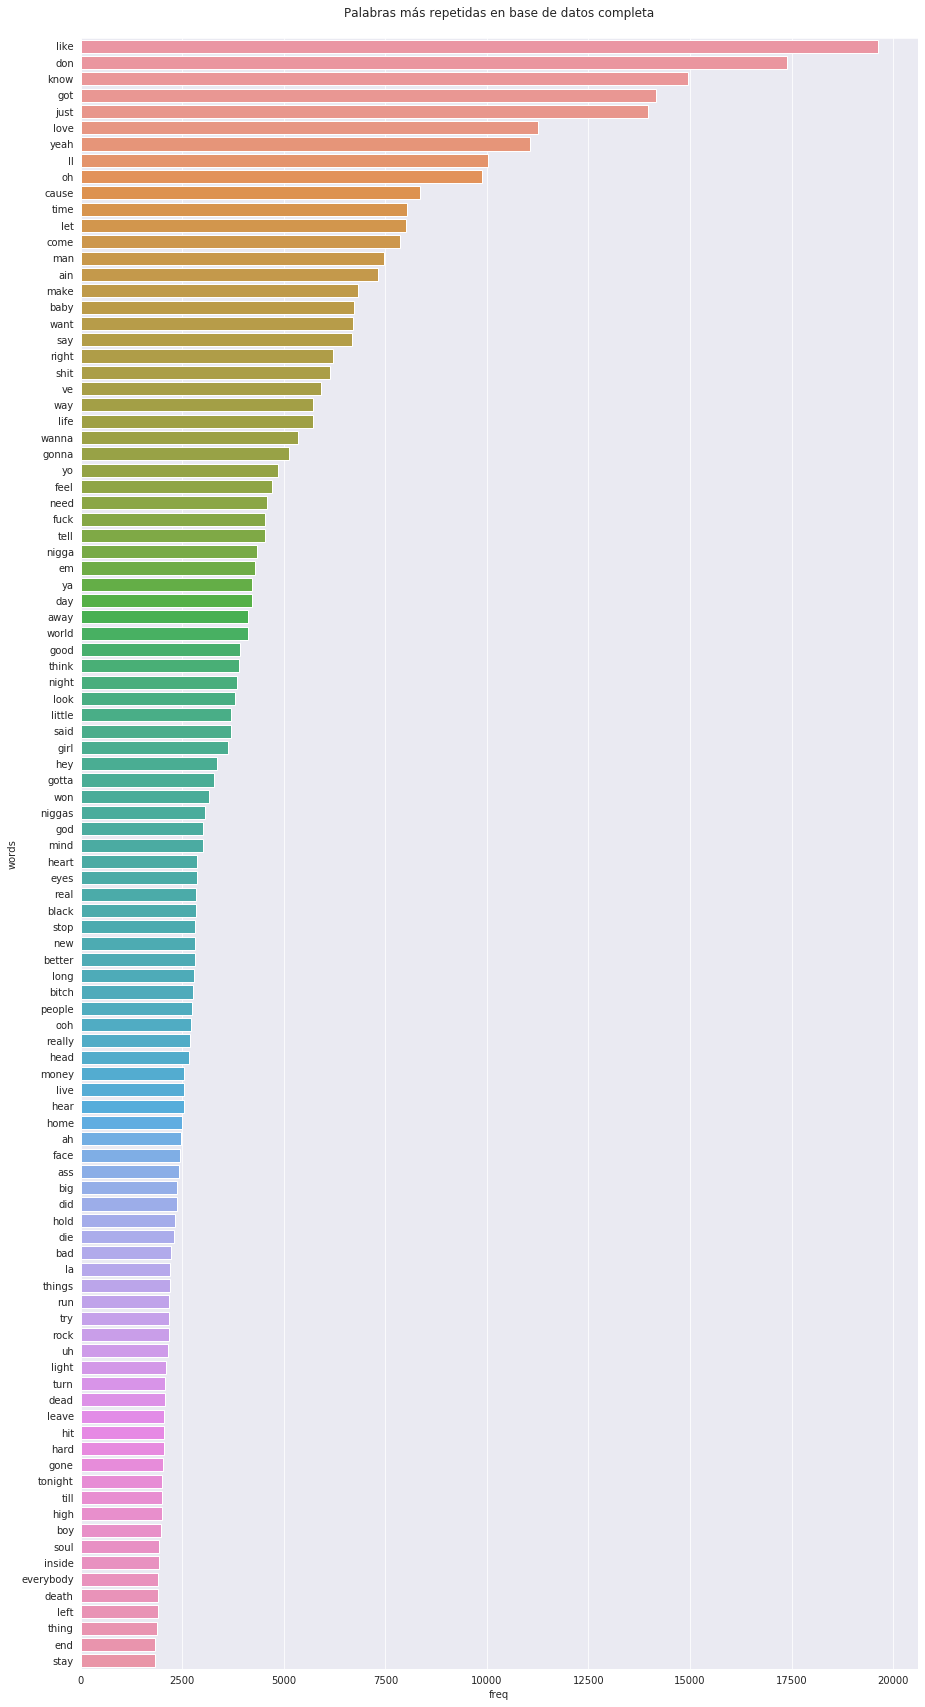

In [13]:
plt.figure(figsize=(15,30))
sn.barplot(y=words_ord['words'], x=words_ord['freq'], data=words_ord)
plt.title('Palabras más repetidas en base de datos completa\n')
plt.show()

In [14]:
def genre_freq(genre):   
    df_genre=df_lyrics[df_lyrics['Genre']==genre]
    cv=CountVectorizer(stop_words='english')
    cv_fit=cv.fit_transform(df_genre['Lyrics'])
    words=cv.get_feature_names()
    words_freq=cv_fit.toarray().sum(axis=0)
    words_df=pd.DataFrame({'words': words, 'freq':words_freq})
    words_ord=words_df.sort_values(by='freq', ascending=False).head(100)
    plt.figure(figsize=(15,30))
    sn.barplot(y=words_ord['words'], x=words_ord['freq'], data=words_ord)
    plt.title('Palabras más repetidas en género '+genre)
    plt.show()   

In [15]:
df_lyrics['Genre'].unique()

array(['metal', 'hiphop', 'rock', 'pop'], dtype=object)

### 100 palabras más repetidas en género metal.

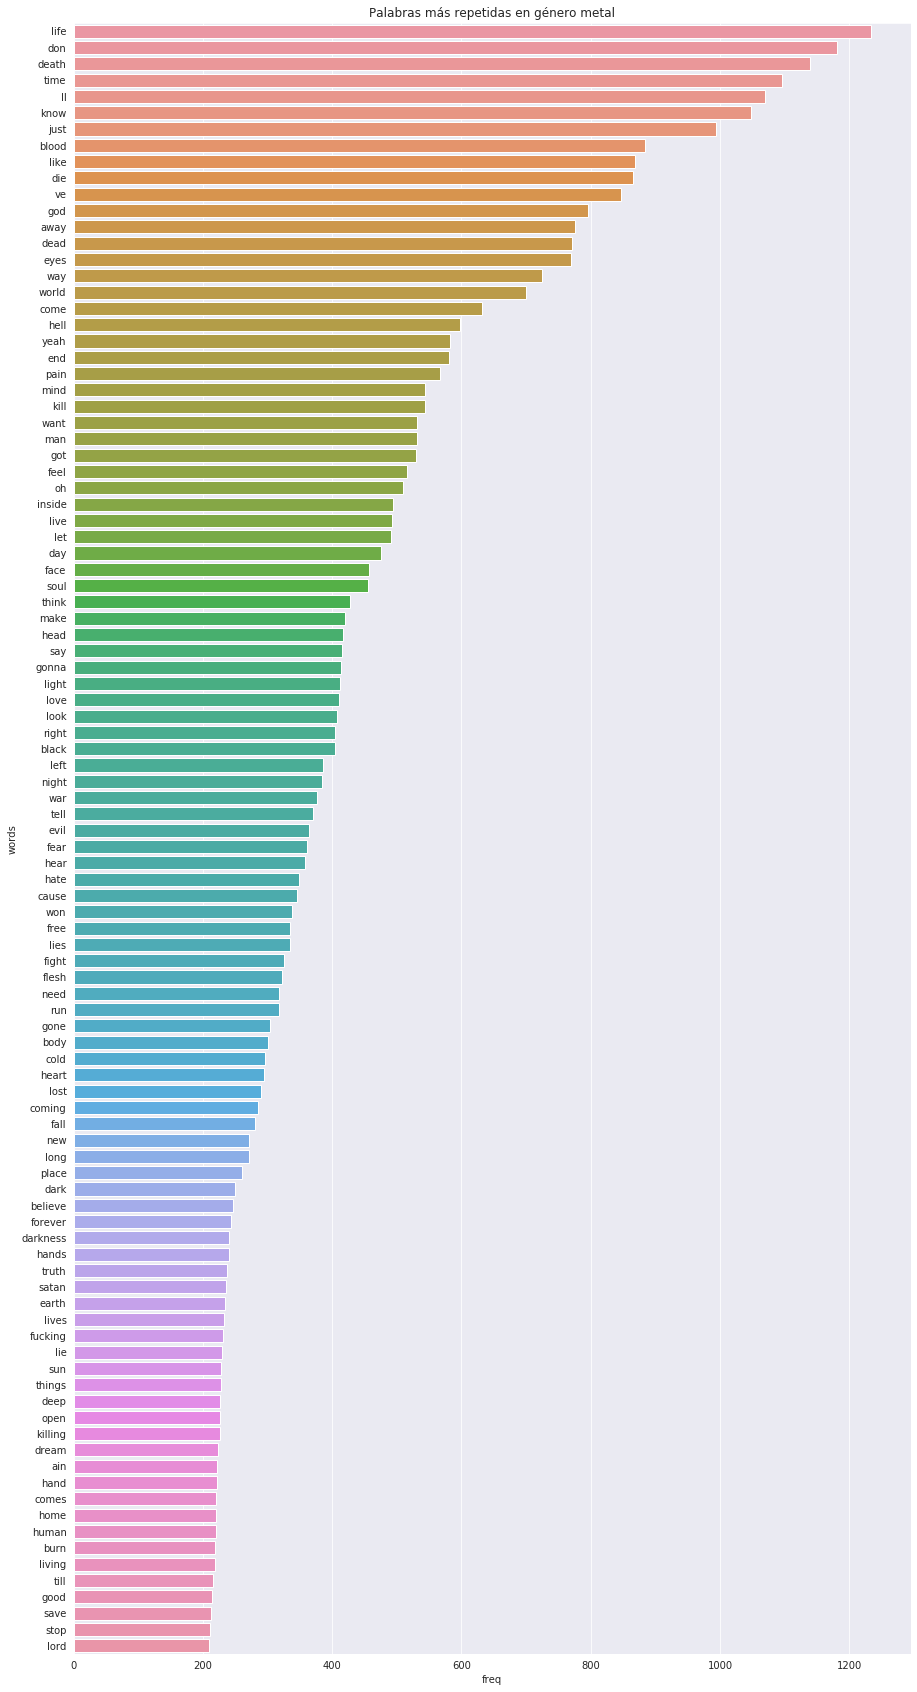

In [16]:
genre_freq('metal')    

### 100 palabras más repetidas en género hiphop.

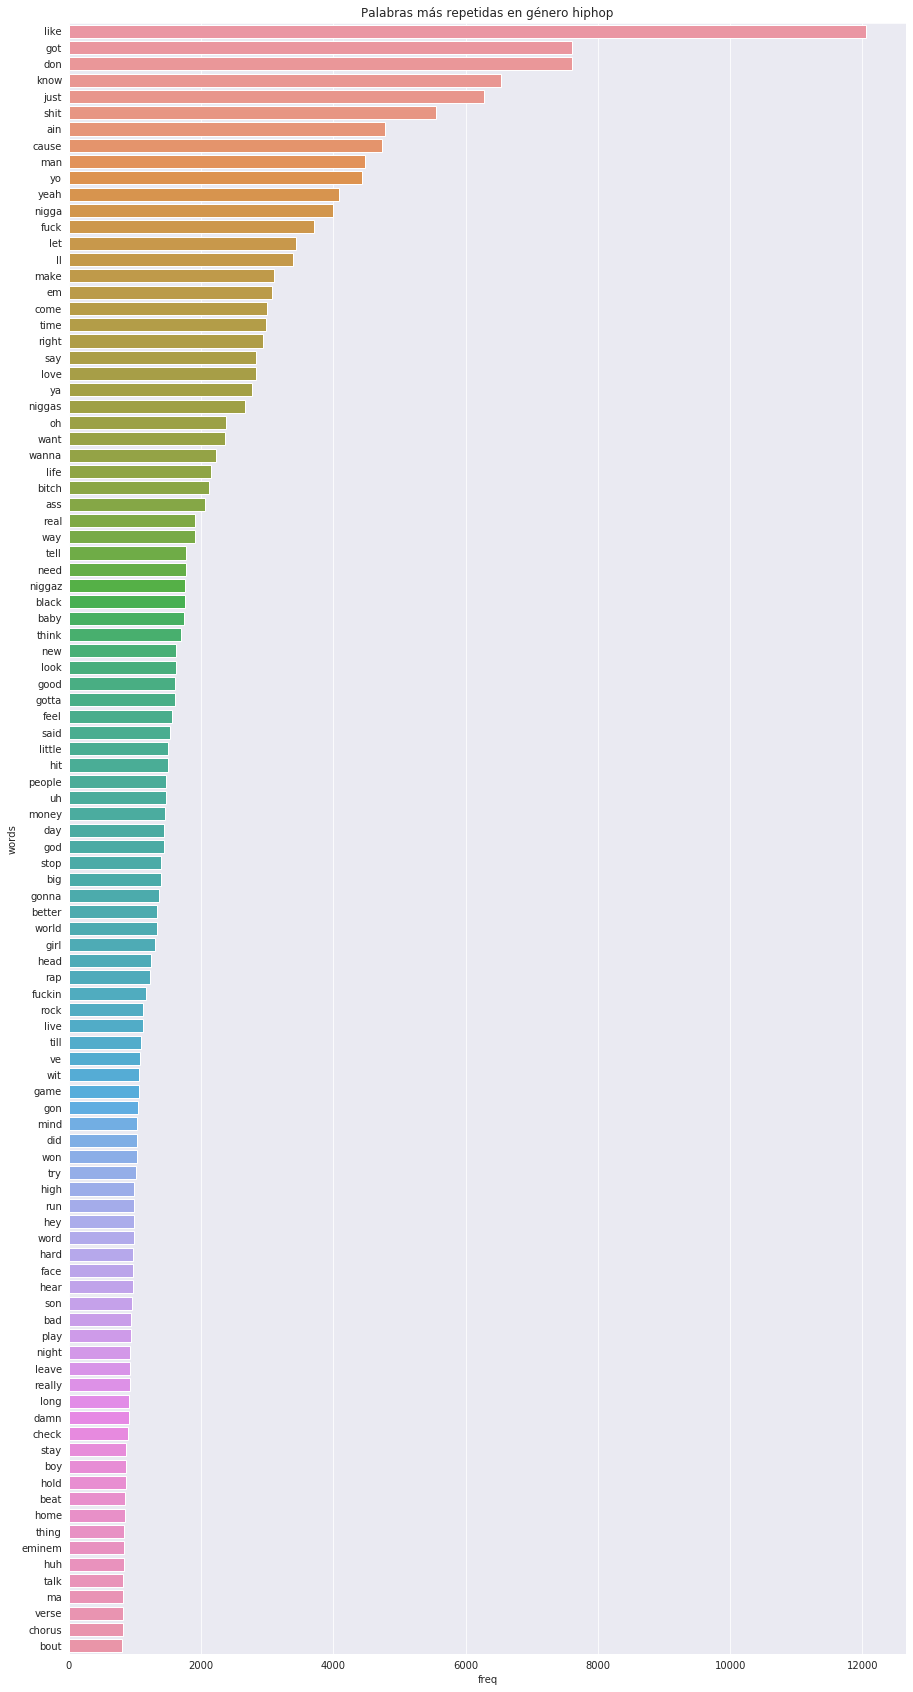

In [17]:
genre_freq('hiphop')

### 100 palabras más repetidas en género rock.

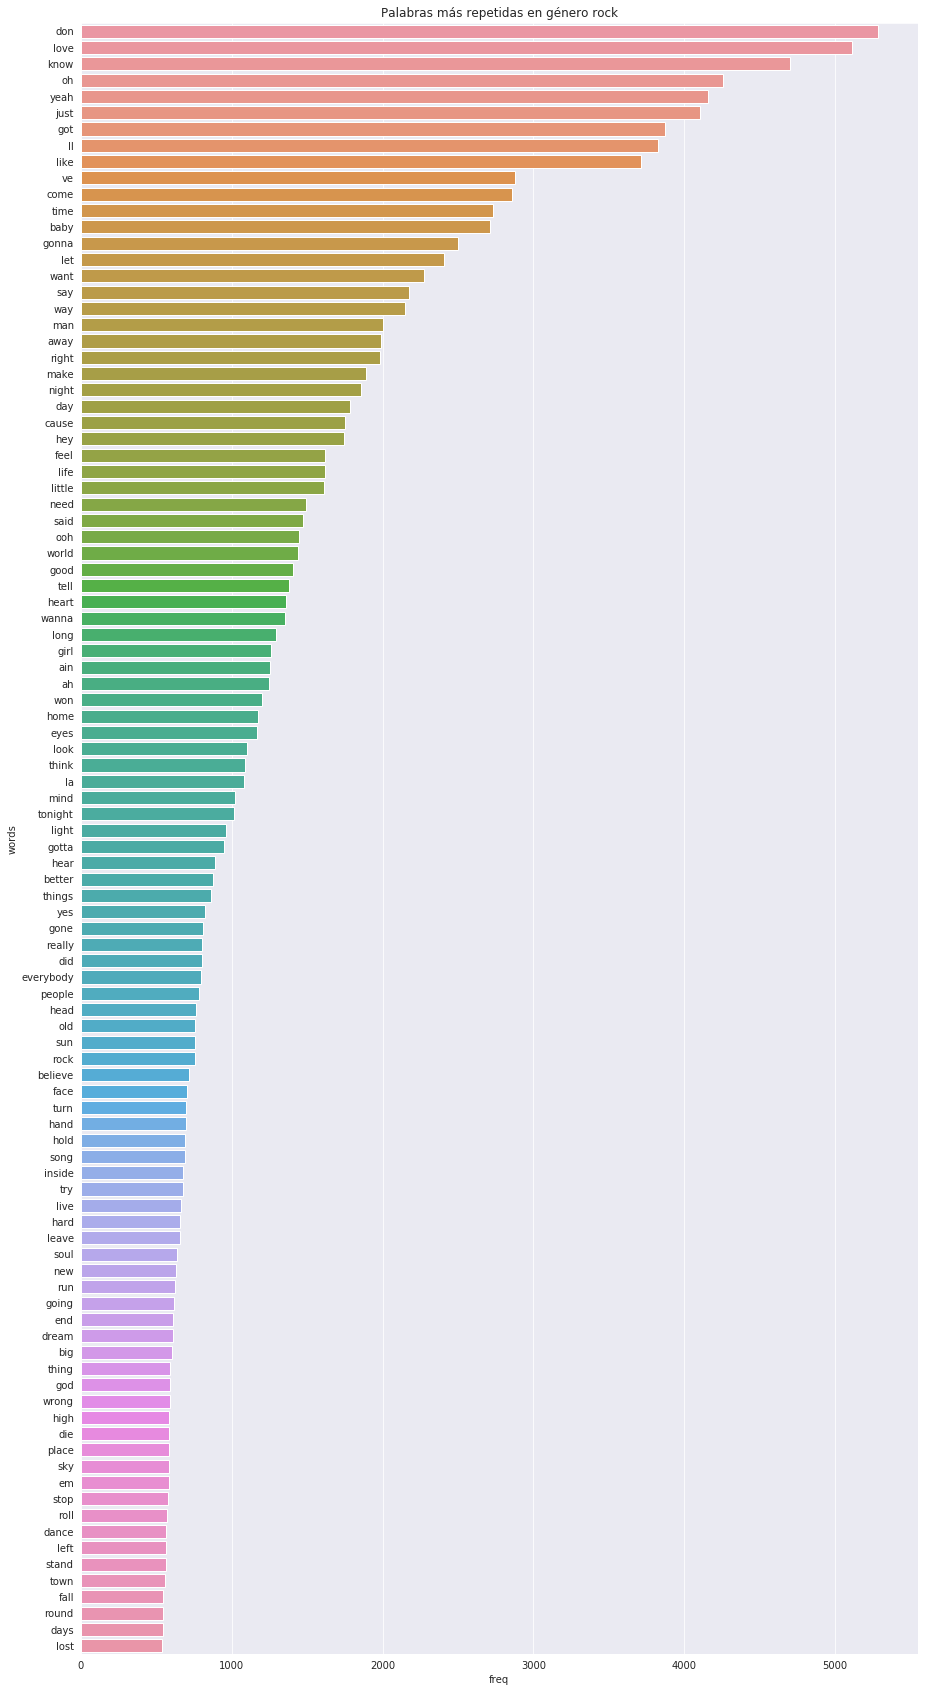

In [18]:
genre_freq('rock')

### 100 palabras más repetidas en género pop.

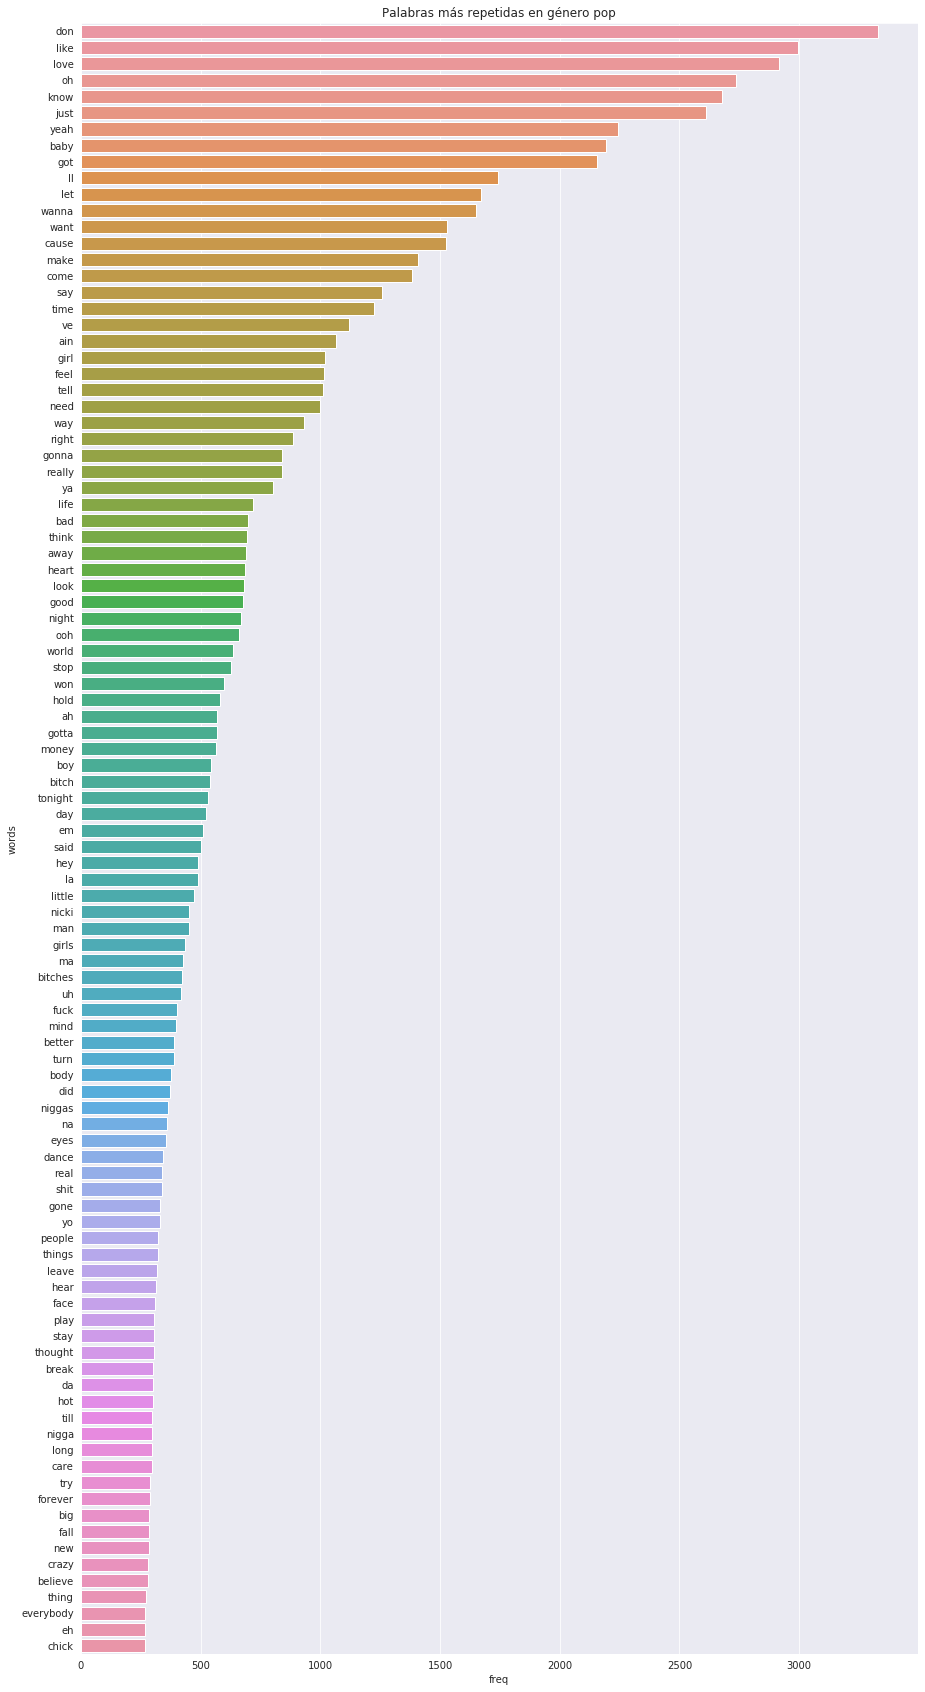

In [19]:
genre_freq('pop')

### Comentarios sobre las principales características de cada género en cuanto a sus palabras.

Para hacer los comentarios se construirá un dataframe que contenga las 15 principales palabras de cada género, de manera de visualizar la situación de cada género y también las coincidencias/diferencias con otros géneros.

In [20]:
def genre_freq_top(genre, cant):   
    df_genre=df_lyrics[df_lyrics['Genre']==genre]
    cv=CountVectorizer(stop_words='english')
    cv_fit=cv.fit_transform(df_genre['Lyrics'])
    words=cv.get_feature_names()
    words_freq=cv_fit.toarray().sum(axis=0)
    words_df=pd.DataFrame({'words': words, 'freq':words_freq})
    words_ord=words_df.sort_values(by='freq', ascending=False).head(cant)
    words_ord=words_ord.reset_index()
    return words_ord

In [21]:
cant=15
metal_15= genre_freq_top('metal',cant)
hiphop_15= genre_freq_top('hiphop',cant)
rock_15= genre_freq_top('rock',cant)
pop_15= genre_freq_top('pop',cant)

In [22]:
genre_top=pd.DataFrame({'metal': metal_15['words'], 'hiphop':hiphop_15['words'],'rock': rock_15['words'], 'pop':pop_15['words']})

In [23]:
genre_top

,metal,hiphop,rock,pop
0,life,like,don,don
1,don,got,love,like
2,death,don,know,love
3,time,know,oh,oh
4,ll,just,yeah,know
5,know,shit,just,just
6,just,ain,got,yeah
7,blood,cause,ll,baby
8,like,man,like,got
9,die,yo,ve,ll


### Comentarios

Los 4 géneros comparten algunas palabras (considerando las 15 principales palabras de cada uno), tales como like, don, know, just, like, ll.

El género del metal tiene palabras distintivas (no presentes en los otros géneros), tales como death, blood, die, god, dead, eyes.

El género del hiphop tiene palabras distintivas (no presentes en los otros géneros), tales como shit, man, nigga, fuck.

Los géneros de rock y pop presentan una gran similitud entre las 15 principales palabras de estos géneros. Entre las palabras similares se encuentran don, love, know, oh, yeah, just, got, ll, like, baby y let (11 de 15). 

### 4. Entrenamiento del Modelo. 

Importe MultinomialNB , train_test_split , Pipeline , confusion_matrix y classification_report . 

Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.

Monte el modelo dentro de un Pipeline , donde el primer paso es implementar CountVectorizer y el segundo sea ejecutar el clasificador MultinomialNB.

Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. 

Reporte las principales métricas.

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_lyrics['Lyrics'],
                                                  df_lyrics['Genre'],
                                                  test_size=.40,
                                                  random_state=9605)

text_classifier = Pipeline([
        ('vectorizer', CountVectorizer(stop_words='english')),
        ('classifier', MultinomialNB())])

text_classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Reporte de las principales métricas.

In [26]:
y_pred=text_classifier.predict(X_test)

### Matriz de confusión.

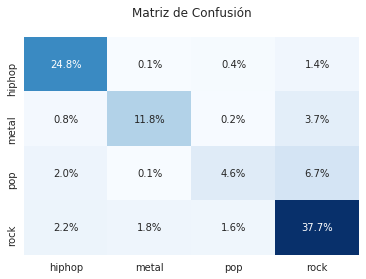

In [27]:
target_label = ['hiphop', 'metal','pop','rock']
cnf=confusion_matrix(y_test, y_pred, labels= target_label)/len(y_test)

# Implementamos un mapa de calor definiendo las clases
sn.heatmap(cnf, xticklabels=target_label,
            yticklabels=target_label,
            # generamos las anotaciones en términos porcentuales
            annot=True, fmt=".1%", 
            # evitamos la barra y cambiamos el colormap
            cbar=False, cmap='Blues')
plt.title('Matriz de Confusión\n')
plt.show()


Nuestro modelo clasifica de forma correcta aproximadamente el 79% de los casos como positivos o negativos. 

El modelo tiende a desempeñarse de peor manera para predicir el género pop (que es el que menos observaciones tiene en la base de datos).

El género de rock es el que presenta un mayor porcentaje de casos predichos correctamente por sobre el total de casos,seguido por el género de hiphop y luego el género de metal.


### Classification report.

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      hiphop       0.83      0.93      0.88      1011
       metal       0.86      0.71      0.78       630
         pop       0.67      0.34      0.46       511
        rock       0.76      0.87      0.81      1644

    accuracy                           0.79      3796
   macro avg       0.78      0.71      0.73      3796
weighted avg       0.78      0.79      0.78      3796



Las métricas reportadas apoyan el diagnóstico realizado con la matriz de confusión. 

El modelo tiene un mejor desempeño para predicir correctamente los géneros de hiphop, metal y rock, al considerar el indicador f1-score (que representa la media armónica entre Precision y Recall).

El género pop es el que tiene los menores indicadores, particularmente en Recall (0.34) lo que significa que la proporción de positivos reales que se identificó correctamente en este género es baja.

## 5. Mejora del Modelo.

Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas. 

Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.

Comente sobre el desempeño general de éste.

### Estrategia

La estrategia para mejorar el desempeño del modelo es aumentar las observaciones para el género que presenta las métricas más bajas, que en este caso corresponde al género pop. Para ello se procederá a trabajar con la carpeta "dum_plus_pop", que contiene una mayor cantidad de canciones del género pop (comparado con la carpeta "dump")

In [29]:
file_list1=glob.glob(os.getcwd()+'/dump_plus_pop/*.csv')

In [30]:
append_csv1=[]
for f in file_list1:
    append_csv1.append(pd.read_csv(f,index_col=None,header=0).drop(columns='Unnamed: 0'))

In [31]:
df_lyrics1=pd.concat(append_csv1)
df_lyrics1.columns=['Artist','Genre','Song','Lyrics']
df_lyrics1.head()

,Artist,Genre,Song,Lyrics
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


In [32]:
df_lyrics1.shape

(10804, 4)

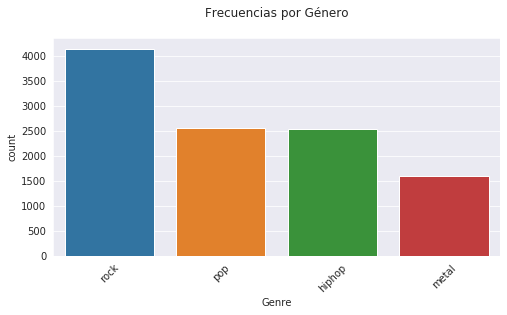

In [33]:
plt.figure(figsize=(8, 4))
sn.countplot(x= df_lyrics1['Genre'],order = df_lyrics1['Genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Frecuencias por Género\n')
plt.show()

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_lyrics1['Lyrics'],
                                                  df_lyrics1['Genre'],
                                                  test_size=.40,
                                                  random_state=9605)

text_classifier1 = Pipeline([
        ('vectorizer', CountVectorizer(stop_words='english')),
        ('classifier', MultinomialNB())
])

text_classifier1.fit(X1_train, y1_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Reporte de las principales métricas.

In [35]:
y1_pred=text_classifier1.predict(X1_test)

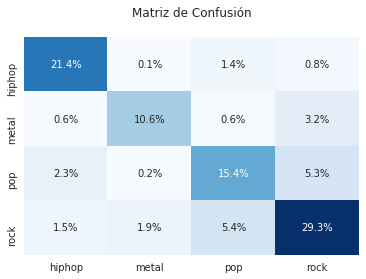

In [36]:
target_label = ['hiphop', 'metal','pop','rock']
cnf1=confusion_matrix(y1_test, y1_pred, labels=target_label)/len(y1_test)

sn.heatmap(cnf1, xticklabels=target_label,
            yticklabels=target_label,
            annot=True, fmt=".1%", 
            cbar=False, cmap='Blues')
plt.title('Matriz de Confusión\n')
plt.show()

Con la nueva base de datos, nuestro modelo clasifica de forma correcta aproximadamente el 77% de los casos como positivos o negativos. 

Para el género pop el porcentaje de casos predichos correctamente por sobre el total de casos, aumentó a 15,4% (comparado con el 4,6% obtenido en el modelo anterior).


El género de rock es el que presenta un mayor porcentaje de casos predichos correctamente por sobre el total de casos, seguido por el género de hiphop.

El género de metal es el que presenta el menor porcentaje de casos predichos correctamente por sobre el total de casos.

In [37]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

      hiphop       0.83      0.90      0.86      1023
       metal       0.83      0.71      0.76       646
         pop       0.68      0.66      0.67      1003
        rock       0.76      0.77      0.76      1650

    accuracy                           0.77      4322
   macro avg       0.77      0.76      0.77      4322
weighted avg       0.77      0.77      0.77      4322



Las métricas reportadas reflejan una mejora en los indicadores del género pop en comparación con el modelo anterior.

Se observa que los indicadores de los otros géneros (hiphop, metal, rock) se mantienen en valores similares a los obtenidos en el modelo anterior.

El principal cambio se observa en el indicador Recall del género pop (que pasó de 0.34 a 0.66), lo que significa que la proporción de positivos reales que se identificó correctamente en este género aumentó notoriamente.